Calculating the mld depth using interpolation of the s-levels in the Norkyst dataset. This creates more continous depths and might make the mld calculations more accurate than using a transformation method from s_rho to z_rho. This notebook is to visualize the differences and compare these two methods of calculating the mld. I will use the xarray interpolation feature as recommended by a colleauge. Ill try using a linear method. If this interpolation lacks effiency, I might consider using xroms and sgrid instead, but I will try to stick with xarray.

In [1]:
from script_mld import dens
from script_mld import transformation
from script_mld import MLD
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np

In [21]:
#example area
ds_2024 = xr.open_dataset(f'/lustre/storeB/project/fou/hi/foccus/datasets/symlinks/norkystv3-hindcast/2024/norkyst800-20240330.nc').isel( time = 0, X = 360, Y = 760)

# Depths to interpolate to
zlevs = np.arange(0,51,1)
zlevs = np.insert(zlevs,len(zlevs),values=np.arange(52,102,2), axis =0)
zlevs = np.insert(zlevs,len(zlevs),values=np.arange(105,305,5), axis =0)
zlevs = np.insert(zlevs,len(zlevs),values=np.arange(520,1020,20), axis =0)
zlevs = np.insert(zlevs,len(zlevs),values=np.arange(1050,3050,50), axis =0)

#interpolation of zlevels from Kjerstis code
z = ds_2024.interp(s_rho = zlevs, method = "linear").to_dataarray()
z_i = z["s_rho"].values
print(z_i.shape)

temp_i = ds_2024.interp(s_rho = zlevs, method = "linear").to_dataarray()
salinity_i = ds_2024.interp(s_rho = zlevs, method = "linear").to_dataarray()

temp_i = temp_i["s_rho"]
salinity_i = salinity_i["s_rho"]
print(temp_i.shape)
print(salinity_i.shape)

(181,)
(181,)
(181,)


In [10]:
ds_2024.head()

<xarray.Dataset> Size: 364B
Dimensions:           (s_rho: 5, s_w: 5)
Coordinates:
    time              datetime64[ns] 8B 2024-03-30
  * s_rho             (s_rho) float64 40B -0.9799 -0.9403 ... -0.8634 -0.8261
    X                 float64 8B 2.88e+05
    Y                 float64 8B 6.08e+05
  * s_w               (s_w) float64 40B -1.0 -0.96 -0.9208 -0.8823 -0.8446
    lon               float64 8B ...
    lat               float64 8B ...
Data variables: (12/18)
    Uwind_eastward    float32 4B ...
    Vwind_northward   float32 4B ...
    zeta              float32 4B ...
    ubar_eastward     float32 4B ...
    vbar_northward    float32 4B ...
    u_eastward        (s_rho) float32 20B ...
    ...                ...
    hc                float64 8B ...
    Cs_r              (s_rho) float64 40B ...
    Cs_w              (s_w) float64 40B ...
    h                 float32 4B ...
    projection_stere  int32 4B ...
    depth             int32 4B ...
Attributes: (12/33)
    id:                      15f95603-12d1-4e0f-8cbe-33946594447f
    naming_authority:        no.met
    operational_status:      scientific
    iso_topic_category:      oceans
    activity_type:           Numerical Simulation
    keywords_vocabulary:     GCMDSK:GCMD Science Keywords:https://gcmd.earthd...
    ...                      ...
    project:                 Norkyst_v3
    license:                 https://spdx.org/licenses/CC-BY-4.0 (CC-BY-4.0)
    title:                   Norkyst-800m - ROMS, Norkyst-800m ocean hindcast...
    summary:                 Norkyst-800m (Norwegian Coast 800m horizontal re...
    title_no:                Hindcast prognoser fra havmodellen Norkyst-800m,...
    summary_no:              NorKyst-800m (Norske kystområder med 800m horiso...

In [22]:
pot_dens = dens(temp_i, salinity_i)
pot_dens = pot_dens.values

In [23]:
MLD(pot_dens=pot_dens, z = z_i)

No depth exceeds treshold. First value of z is returned: 3000


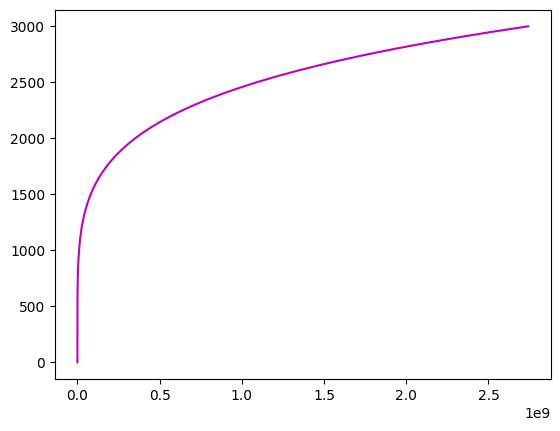

In [27]:
plt.plot(pot_dens,z_i, color = "m")